In [2]:
import os
import pandas as pd
import numpy as np
import math

In [3]:
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data')

def get_train_set():
    fp = os.path.join(path,'train.csv')
    df_train = pd.read_csv(fp, encoding='ISO-8859-1',low_memory=False) 
    return df_train

df_train = get_train_set()
df_train.info()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\YoS1\\Amazinum_Homeworks-main\\Amazinum_Homeworks-main\\data\\train.csv'

In [4]:
def get_test_set():
    fp = os.path.join(path,'test.csv')
    df_test = pd.read_csv(fp, encoding='ISO-8859-1',low_memory=False) 
    return df_test
df_test=get_test_set()

df_test.info()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\YoS1\\Amazinum_Homeworks-main\\Amazinum_Homeworks-main\\data\\test.csv'

In [5]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df_train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
df_test = pd.read_csv(test_url)

In [21]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [7]:
def develop_family_size(df_train,df_test):
    df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
    df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1
    return df_train,df_test
df_train,df_test=develop_family_size(df_train,df_test)

In [8]:
def get_X_train_test(df_train, df_test): 
    print ('Extracting features.')
# List of features to consider
    cols_to_keep= [#'PassengerId',
     'Pclass',
     'Sex',
     'Age',
     #'SibSp',
     #'Parch',
     'Fare',
     'Embarked',
     'FamilySize',]
    X_train = df_train[cols_to_keep]
    X_test = df_test[cols_to_keep]
    return X_train, X_test, cols_to_keep

X_train, X_test, features  = get_X_train_test(df_train, df_test)

y_train = df_train['Survived']

X_train.shape

Extracting features.


(891, 6)

In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
def label_encoder(X_train,X_test):    
    print ('label encoding.')
    X_train = X_train.copy() # to avoid warning related to setting the copy...
    X_test = X_test.copy() # to avoid warning related to setting the copy...
    columns_to_encode = ['Sex']
    for col in columns_to_encode:
        le = LabelEncoder().fit(X_train[col].astype(str)) # convert to str first since le may fail due to difference type of data
        X_train[col] = le.transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
    X_train = pd.get_dummies(X_train,columns=['Embarked'])
    X_test = pd.get_dummies(X_test,columns=['Embarked'])
    return X_train,X_test

X_train,X_test= label_encoder(X_train,X_test)
X_train.dtypes

label encoding.


Pclass          int64
Sex             int32
Age           float64
Fare          float64
FamilySize      int64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [11]:
def fill_na(df,list_col):
    print ('filling NaN...')
    for col in list_col:
        if df[col].isna().any():
            median=df[col].median()
            df[col]= df[col].fillna(median)
fill_na(X_train,['Age'])
fill_na(X_test,['Age','Fare'])
# check after fillna 
X_train.isna().any().any(), X_test.isna().any().any()

filling NaN...
filling NaN...


(False, False)

In [12]:
def convert_age(age):
    if(math.isnan(age)):
        return float('NaN')
    if age<15:
        return 0
    elif age<30:
        return 1
    elif age<50:
        return 2
    else: return 3 
#df_train=convert_age(df_train['Age'])
X_train['Age_Category'] = [convert_age(age) for age in X_train['Age']]
X_test['Age_Category'] = [convert_age(age) for age in X_test['Age']]
features.append('Age_Category')

X_train.drop('Age',axis=1,inplace=True)
X_test.drop('Age',axis=1,inplace=True)
features.remove('Age')

In [13]:
X_train.isna().sum()

Pclass          0
Sex             0
Fare            0
FamilySize      0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Age_Category    0
dtype: int64

In [14]:
X_train

,Pclass,Sex,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Age_Category
0,3,1,7.2500,2,0,0,1,1
1,1,0,71.2833,2,1,0,0,2
2,3,0,7.9250,1,0,0,1,1
3,1,0,53.1000,2,0,0,1,2
4,3,1,8.0500,1,0,0,1,2
...,...,...,...,...,...,...,...,...
886,2,1,13.0000,1,0,0,1,1
887,1,0,30.0000,1,0,0,1,1
888,3,0,23.4500,4,0,0,1,1
889,1,1,30.0000,1,1,0,0,1


In [15]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
    print ('normalizing.')
    scaler= MinMaxScaler()
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled 

X_train_scal, X_test_scaled  = normalize(X_train, X_test)
type(X_train_scal)

normalizing.


numpy.ndarray

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier


Split train dataset 

In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
def apply_preprocessing(df_train,df_test):
    df_train,df_test=develop_family_size(df_train,df_test)
    
    X_train, X_test, features  = get_X_train_test(df_train, df_test)
    y_train = df_train['Survived']
    
    X_train,X_test= label_encoder(X_train,X_test)
    
    fill_na(X_train,['Age'])
    fill_na(X_test,['Age','Fare'])
    #X_train['Age_Category'] = [convert_age(age) for age in X_train['Age']]
    #X_test['Age_Category'] = [convert_age(age) for age in X_test['Age']]
    #features.append('Age_Category')

    #X_train.drop('Age',axis=1,inplace=True)
    #X_test.drop('Age',axis=1,inplace=True)
    #features.remove('Age')
    
    X_train_scal, X_test_scaled  = normalize(X_train, X_test)
    
    X_train_scaled, X_train_test,y_train,y_train_test = train_test_split(X_train_scal,y_train,test_size=0.2)
    return X_train_scaled, X_train_test,y_train,y_train_test, X_test_scaled

X_train_scaled, X_train_val,y_train,y_train_val,X_test_scaled = apply_preprocessing(df_train,df_test)   

Extracting features.
label encoding.
filling NaN...
filling NaN...
normalizing.


In [51]:
clf = LogisticRegression(max_iter=10000)
grid_values = {'C': [0.005, 0.01,0.1, 1, 100, 10000, 100000]}
grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='accuracy')
grid_clf.fit(X_train_scaled, y_train)
print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
print('Grid best score (f1): ', grid_clf.best_score_) 
print(grid_clf.score(X_train_scaled,y_train))
 
print(grid_clf.score(X_train_val,y_train_val))

Grid best parameter (max f1 ):  {'C': 1}
Grid best score (f1):  0.8103319215995273
0.8103932584269663
0.7821229050279329


In [42]:
clf = SVC(kernel='poly')           
grid_values = {'C': [0.01, 0.1, 1, 100, 200]}
grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='accuracy')
grid_clf.fit(X_train_scaled, y_train)
print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
print('Grid best score (f1): ', grid_clf.best_score_) 
print("train accuracy= {:.3%}".format(grid_clf.score(X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(grid_clf.score(X_train_val,y_train_val)))

Grid best parameter (max f1 ):  {'C': 1}
Grid best score (f1):  0.8103910174332709
train accuracy= 82.163%
test accuracy= 80.447%


In [43]:
clf = SVC(kernel='rbf')
grid_values = {'C': [0.005, 0.01, 0.02, 0.03, 0.1, 1, 100, 10000], 'gamma':[0.001, 0.01, 0.1,1]}
grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='accuracy')
grid_clf.fit(X_train_scaled, y_train)
print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
print('Grid best score (f1): ', grid_clf.best_score_) 
print("train accuracy= {:.3%}".format(grid_clf.score(X_train_scaled,y_train)))
 
print("test accuracy= {:.3%}".format(grid_clf.score(X_train_val,y_train_val)))

Grid best parameter (max f1 ):  {'C': 100, 'gamma': 0.1}
Grid best score (f1):  0.8145769723234512
train accuracy= 81.742%
test accuracy= 80.447%


In [44]:
clf = DecisionTreeClassifier()
grid_values = {'max_depth': [2,5]}#,7, 20, 50]}
grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='accuracy')
grid_clf.fit(X_train_scaled, y_train)
print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
print('Grid best score (f1): ', grid_clf.best_score_) 
print("train accuracy= {:.3%}".format(grid_clf.score(X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(grid_clf.score(X_train_val,y_train_val)))

Grid best parameter (max f1 ):  {'max_depth': 5}
Grid best score (f1):  0.8187924751305033
train accuracy= 86.236%
test accuracy= 81.564%


In [74]:
clf = RandomForestClassifier()     
grid_values = {'n_estimators': [10,20],'max_depth':[1,3,5],'min_samples_split':[2,3,4]} #,200,300]}
grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='accuracy')
grid_clf.fit(X_train_scaled, y_train)
print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
print('Grid best score (f1): ', grid_clf.best_score_) 
print("train accuracy= {:.3%}".format(grid_clf.score(X_train_scaled,y_train)))
 
print("test accuracy= {:.3%}".format(grid_clf.score(X_train_val,y_train_val)))

Grid best parameter (max f1 ):  {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 10}
Grid best score (f1):  0.8230473751600511
train accuracy= 83.287%
test accuracy= 82.682%


In [52]:
clf = MLPClassifier(hidden_layer_sizes = [50,10,10],max_iter=2000) #, 100])
grid_values = {'alpha' : [0.001, 0.01, 0.1, 1, 10]}
grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='accuracy')
grid_clf.fit(X_train_scaled, y_train)
print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
print('Grid best score (f1): ', grid_clf.best_score_) 
print("train accuracy= {:.3%}".format(grid_clf.score(X_train_scaled,y_train)))
 
print("test accuracy= {:.3%}".format(grid_clf.score(X_train_val,y_train_val)))

Grid best parameter (max f1 ):  {'alpha': 1}
Grid best score (f1):  0.8272530286614792
train accuracy= 83.006%
test accuracy= 76.536%


In [74]:
clf = XGBClassifier(max_depth=3,gamma = 1).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score(X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_train_val,y_train_val)))

train accuracy= 86.657%
test accuracy= 84.358%


In [34]:
features.remove('Embarked')
features = features + ['Embarked_C', 'Embarked_Q', 'Embarked_S']#Pclass	Sex	Fare	FamilySize	Embarked_C	Embarked_Q	Embarked_S	Age_Categor

ValueError: list.remove(x): x not in list

In [75]:
features

['Pclass',
 'Sex',
 'Fare',
 'FamilySize',
 'Age_Category',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [76]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(6, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)


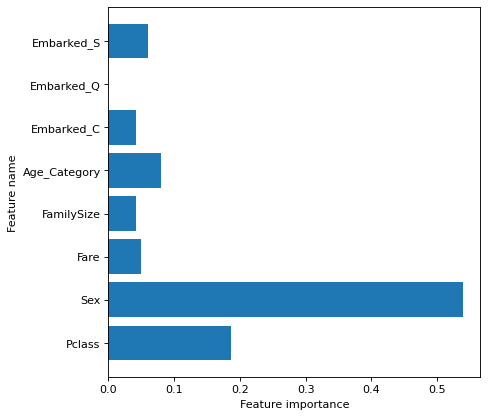

In [77]:
#for XGB
y_train_all=df_train['Survived']
#clf.fit(X_train_scal, y_train_all)
plot_feature_importances(clf, features)

In [78]:
predictions = clf.predict(X_test_scaled)

In [79]:
final_df = pd.DataFrame(df_test['PassengerId'])
final_df['Survived']=predictions

In [80]:
final_df.to_csv('predictions_xgb_19_12.csv',index=False)

In [81]:
X_test

,Pclass,Sex,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Age_Category
0,3,1,7.8292,1,0,1,0,2
1,3,0,7.0000,2,0,0,1,2
2,2,1,9.6875,1,0,1,0,3
3,3,1,8.6625,1,0,0,1,1
4,3,0,12.2875,3,0,0,1,1
...,...,...,...,...,...,...,...,...
413,3,1,8.0500,1,0,0,1,1
414,1,0,108.9000,1,1,0,0,2
415,3,1,7.2500,1,0,0,1,2
416,3,1,8.0500,1,0,0,1,1


## Results in Kaggle

(-0.5, 765.5, 601.5, -0.5)

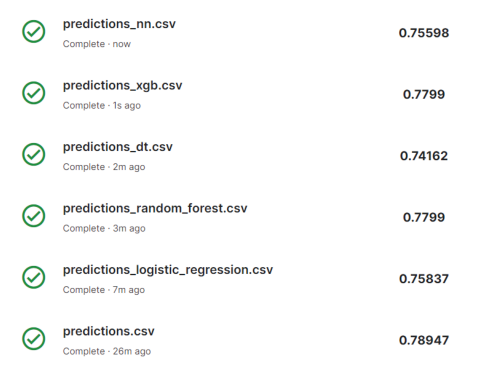

In [92]:
import os

cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data')
fn=  os.path.join(path , 'results.png')
image = np.array(plt.imread(fn))
plt.figure()
plt.imshow(image)
plt.axis('off')

In [19]:
import seaborn as sns